<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson02_jupyter/lecture_note2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google colabへのリンク

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson02_jupyter/lecture_note2.ipynb)

# 使用しているversionについて

In [1]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd

In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのバージョン確認
!python -V

Python 3.7.13


In [4]:
# panasのversion
pd.__version__

'1.3.5'

## Pandasについて
- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。
- 特に、数表および時系列データを操作するためのデータ構造と演算を提供する。

## 参考リンク（もうちょっといろいろ知りたい人用）

**全般的に**
- [データ分析で頻出のPandas基本操作 - qiita](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)
    - 基本操作についてまとめてくれている。

**基本操作系**
- [Pandas Cheet Sheet - GitHub](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    - 基本操作について1ページでまとめてくれているCheet Sheet
    
- [StatsFragments by @sinhrks](http://sinhrks.hatenablog.com/)
    - 各種Pandasメソッドを図付きで詳細に解説してくれています。非常に参考になる。
    

**集計テクニック系**
- [pandasで条件分岐(case when的な)によるデータ加工を網羅したい](https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f)
    - SQLのcase whenのような条件分岐の処理をpandasでやりたいときが良くありますがなかなか難しい。そんなときのお助け記事。
    
**作図系**
- [PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス - Qiita](https://qiita.com/hik0107/items/de5785f680096df93efa)
    - Pandas Plotでできることの概要がわかります
- [pythonで美しいグラフ描画 -seabornを使えばデータ分析と可視化が捗る その1 - Qiita](https://qiita.com/hik0107/items/3dc541158fceb3156ee0)
    - Pandas Plot, matplotlibと比較して簡単に美しいプロットがかけるmatplotのラッパーseabornの概要がわかります 

# 目次

### 1. データの読み込み
### 2. データや統計量の表示
### 3. データの欠損状態の確認
### 4. データの並び替え
### 5. データの追加
### 6. データの表示
### 7. データの出力

# 1. データの読み込み

元のデータ

http://phenol-explorer.eu/downloads

Structures for Polyphenols having composition data (SMILES)をダウンロード
して少しデータを追加したもの。

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/output.csv', sep=',')

# 2. データや統計量の表示

In [7]:
df.head(1) 

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.58,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC,2.6635,0.079643,639.170832,4,2,0,0


In [8]:
df.tail(1)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
491,730,COC1=CC(=CC=C1O)C(=O)C(O)CO,Other polyphenols,Hydroxybenzoketones,"2,3-Dihydroxy-1-guaiacylpropanone",212.199,C10H12O5,NaN,2004-05-06 16:14:14 UTC,2015-05-10 23:29:00 UTC,-0.0633,0.608331,212.068473,1,1,0,0


In [9]:
df.sample()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
418,633,CCC1=CC(OC)=C(O)C=C1,Other polyphenols,Alkylmethoxyphenols,4-Ethylguaiacol,152.19,C9H12O2,2785-89-9,2007-02-21 00:00:00 UTC,2015-05-10 23:28:57 UTC,1.9632,0.701552,152.08373,1,1,0,0


In [10]:
df.describe()

,id,molecular_weight,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,376.518293,439.122771,1.026019,0.359583,439.823104,2.829268,0.632114,0.032520,0.0
std,211.994048,226.451341,2.510341,0.232284,227.173667,2.921114,1.077839,0.218678,0.0
min,3.000000,94.111200,-5.298300,0.016294,94.041865,0.000000,0.000000,0.000000,0.0
25%,220.750000,302.225250,-0.519700,0.155655,302.033556,1.000000,0.000000,0.000000,0.0
50%,381.500000,431.038000,1.046350,0.290155,431.602009,2.000000,0.000000,0.000000,0.0
75%,569.750000,578.519250,2.520775,0.574867,578.142426,4.000000,1.000000,0.000000,0.0
max,730.000000,2805.900000,10.713100,0.887434,2804.229343,43.000000,7.000000,3.000000,0.0


In [11]:
df.shape

(492, 17)

# 3. データの欠損状態の確認

In [12]:
# 欠損値を確認する。
df.isnull().sum()

id                     0
smiles                 0
compound_class         0
compound_subclass      0
name                   0
molecular_weight       0
formula                0
cas_number           299
created_at             0
updated_at             0
MolLogP                0
qed                    0
ExactMolWt             0
fr_phenol              0
fr_methoxy             0
fr_lactone             0
fr_urea                0
dtype: int64

In [13]:
df.shape

(492, 17)

In [14]:
# '欠損値のある行を削除
df.dropna(subset=['cas_number'], axis=0).shape

(193, 17)

In [15]:
#欠損値のある列（ここでは、cas_number）を、１列指定して削除
df.drop('cas_number', axis=1).shape

(492, 16)

In [16]:
# 欠損値を置き換え
df.fillna(value={'cas_number': 0}).shape

(492, 17)

# 4. データの並び替えや任意の列の抽出して新しいデータフレームを作成

In [17]:
df.columns

Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at', 'updated_at',
       'MolLogP', 'qed', 'ExactMolWt', 'fr_phenol', 'fr_methoxy', 'fr_lactone',
       'fr_urea'],
      dtype='object')

In [18]:
# 任意の列だけ取り出す。
df[['smiles', 'formula']].head(3)

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


In [19]:
# 上書きする。
df2 = df[['smiles', 'formula']].head(3)

In [20]:
df2

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


# 5. データの追加

In [21]:
#Pandasを使ってワンホットエンコーディング
df2 = pd.get_dummies(df, columns=['compound_class'])

In [22]:
df2.columns

Index(['id', 'smiles', 'compound_subclass', 'name', 'molecular_weight',
       'formula', 'cas_number', 'created_at', 'updated_at', 'MolLogP', 'qed',
       'ExactMolWt', 'fr_phenol', 'fr_methoxy', 'fr_lactone', 'fr_urea',
       'compound_class_Flavonoids', 'compound_class_Lignans',
       'compound_class_Other polyphenols', 'compound_class_Phenolic acids',
       'compound_class_Stilbenes'],
      dtype='object')

In [23]:
df2.shape

(492, 21)

In [24]:
# 自作した関数を入れる。
def over0(num):
    if num >=0:
        return 1
    else:
        return 0
    
df2["MolLogP_over1"] = df2["MolLogP"].map(over0)

In [25]:
df2.describe()

,id,molecular_weight,MolLogP,qed,ExactMolWt,fr_phenol,fr_methoxy,fr_lactone,fr_urea,compound_class_Flavonoids,compound_class_Lignans,compound_class_Other polyphenols,compound_class_Phenolic acids,compound_class_Stilbenes,MolLogP_over1
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,376.518293,439.122771,1.026019,0.359583,439.823104,2.829268,0.632114,0.032520,0.0,0.544715,0.058943,0.158537,0.217480,0.020325,0.666667
std,211.994048,226.451341,2.510341,0.232284,227.173667,2.921114,1.077839,0.218678,0.0,0.498503,0.235758,0.365615,0.412951,0.141254,0.471884
min,3.000000,94.111200,-5.298300,0.016294,94.041865,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.750000,302.225250,-0.519700,0.155655,302.033556,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,381.500000,431.038000,1.046350,0.290155,431.602009,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,569.750000,578.519250,2.520775,0.574867,578.142426,4.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,730.000000,2805.900000,10.713100,0.887434,2804.229343,43.000000,7.000000,3.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df2["molecular_weight_int"] = df2["molecular_weight"].map(int)
df2.shape

(492, 23)

In [27]:
# 作ったものを削除
df2.drop('molecular_weight_int', axis=1).shape

(492, 22)

# 6. データの表示

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05ce09b310>]],
      dtype=object)

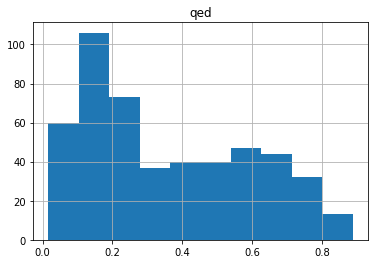

In [28]:
df.hist('qed')

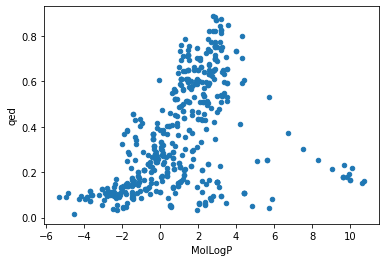

In [29]:
df.plot(kind='scatter', x='MolLogP', y='qed')

# 7. データの出力

In [30]:
ls data/

ls: cannot access 'data/': No such file or directory


In [31]:
df.to_csv('output2.csv', index=False)

In [32]:
ls 

drive/  output2.csv  sample_data/


In [33]:
!rm output2.csv

In [34]:
ls

drive/  sample_data/


# 以上です